In [1]:
from system import *
import matplotlib.pyplot as plt
import time
import pickle
from scipy.integrate import solve_ivp
import autograd.numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
from autograd import jacobian
import matplotlib.pyplot as plt
from matplotlib import cm


np.random.seed(232)
x0=np.random.random(2) * 2
x0_2=np.random.random(2)

In [2]:
def add_arrow(line, position=None, direction='right', size=15, color=None):
    """
    add an arrow to a line.

    line:       Line2D object
    position:   x-position of the arrow. If None, mean of xdata is taken
    direction:  'left' or 'right'
    size:       size of the arrow in fontsize points
    color:      if None, line color is taken.
    """
    if color is None:
        color = line.get_color()

    xdata = line.get_xdata()
    ydata = line.get_ydata()

    if position is None:
        position = xdata.mean()
    # find closest index
    start_ind = np.argmin(np.absolute(xdata - position))
    if direction == 'right':
        end_ind = start_ind + 1
    else:
        end_ind = start_ind - 1

    line.axes.annotate('',
        xytext=(xdata[start_ind], ydata[start_ind]),
        xy=(xdata[end_ind], ydata[end_ind]),
        arrowprops=dict(arrowstyle="-|>", color=color),
        size=size
    )

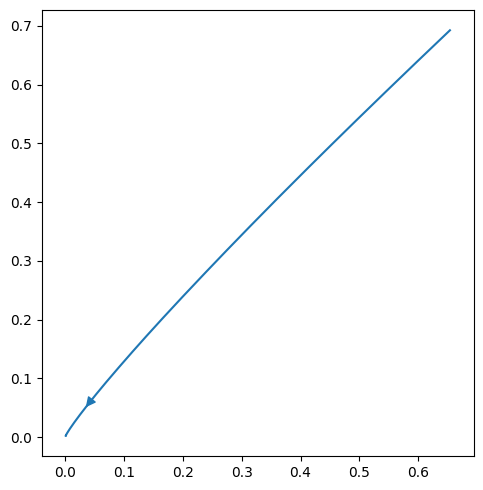

In [3]:
%matplotlib inline
fig, ax = plt.subplots()

W = weight_matrix
theta = bias_matrix
phi = lambda x: np.tanh(x)
f = lambda t, x: 1 / tau * (-x + phi(W@x + theta))

t_eval = np.arange(0, 20, 0.05)
sol = solve_ivp(f, t_span=[0, 20], y0=x0, t_eval=t_eval)

l, = ax.plot(sol.y[0], sol.y[1], label='x(t)')
ax.set_aspect('equal', adjustable='datalim')
add_arrow(l)

fig.set_size_inches((5, 5))
plt.tight_layout()
plt.savefig('p1.jpeg', dpi=500)

[[-0.86521611 -0.046081  ]
 [ 0.04575899 -0.86493071]]


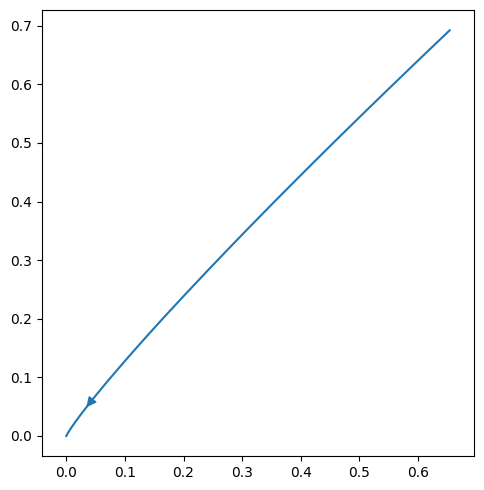

In [4]:
phi = lambda x: np.tanh(x)
f = lambda x: 1 / tau * (-x + phi(W@x + theta))

jacobian_ = jacobian(f)
A = jacobian_(np.zeros(2))
print(A)
linf = lambda t, x: A @ x

t_eval = np.arange(0, 20, 0.05)
sol = solve_ivp(linf, t_span=[0, 20], y0=x0, t_eval=t_eval)

fig, ax = plt.subplots()
l, = ax.plot(sol.y[0], sol.y[1], label='x(t)')
ax.set_aspect('equal', adjustable='datalim')
add_arrow(l)

fig.set_size_inches((5, 5))
plt.tight_layout()

[[-0.8662807  -0.04571703]
 [ 0.04426625 -0.86933693]]


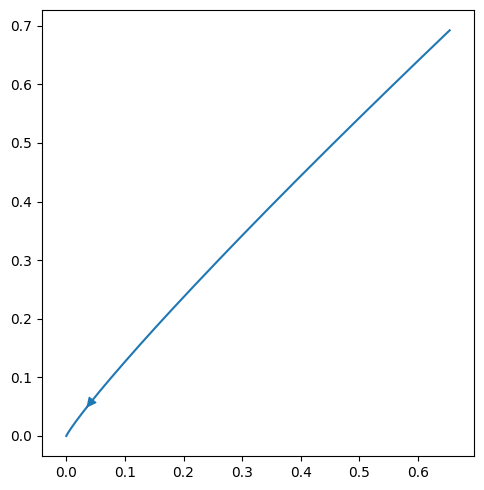

In [5]:
phi = lambda x: np.tanh(x)
f = lambda x: 1 / tau * (-x + phi(W@x + theta))

jacobian_ = jacobian(f)
A = jacobian_(np.ones(2))
print(A)
linf = lambda t, x: A @ x

t_eval = np.arange(0, 20, 0.05)
sol = solve_ivp(linf, t_span=[0, 20], y0=x0, t_eval=t_eval)

fig, ax = plt.subplots()
l, = ax.plot(sol.y[0], sol.y[1], label='x(t)')
ax.set_aspect('equal', adjustable='datalim')
add_arrow(l)

fig.set_size_inches((5, 5))
plt.tight_layout()